In [1]:
os.chdir("/mnt/c/Users/monique/Documents/Codes/gifs/")

In [7]:
from scatter_letters import sl

In [3]:
# simple use
sl.text_to_gif('data_')

Coordinates:   0%|          | 0/5 [00:00<?, ?it/s]

Plotting:   0%|          | 0/5 [00:00<?, ?it/s]

Frames:   0%|          | 0/25 [00:00<?, ?it/s]

Frames:   0%|          | 0/25 [00:00<?, ?it/s]

Frames:   0%|          | 0/25 [00:00<?, ?it/s]

Frames:   0%|          | 0/25 [00:00<?, ?it/s]

Frames:   0%|          | 0/25 [00:00<?, ?it/s]

Gif:   0%|          | 0/155 [00:00<?, ?it/s]

Removing Imgs:   0%|          | 0/125 [00:00<?, ?it/s]

DONE


![](output/movie.gif)

In [13]:
# all parameters
sl.text_to_gif('a', # text to be converted to gif
               out_path='output', # relative path to save temp files and output
               repeat=True, # repeat first letter at the end
               intensity=10, # more info below*
               rand=True, # True=random points, false= evenly sparced
               gif_name='movie', # name of the output file. -> movie.gif
               n_frames=24, # number of frames in the transition
               bg_color='#95A4AD', # background color
               marker='o', # marker style
               marker_color='#283F4E', # marker color 
               marker_size=10, # marker size
               fps=24, # frames per second
               alpha=1, # markers opacity
               axis_on=True, # plot spines and grid
               sort_coords=False, # sort points in the transition - options(False, 'x', 'y')
               sort_coords_asc=True, # True - sort ascending / False - sort descending
               in_path='./images/letters', # for custom input paths
               hold_frames=5) # hold the complete letter for x frames

# *intensity: 
# When plotting random points (rand=True), this is how many times it'll generate 500 points at the start (before applying the mask).
# With randoms a higher intensity means more points.
# When plotting evenly sparced points (rand=False), this is the distance between the points.
# With even points a lower intensity means the points will be closer to each other, so more points are plotted.

Coordinates:   0%|          | 0/7 [00:00<?, ?it/s]

Plotting:   0%|          | 0/2 [00:00<?, ?it/s]

Frames:   0%|          | 0/25 [00:00<?, ?it/s]

Frames:   0%|          | 0/25 [00:00<?, ?it/s]

Gif:   0%|          | 0/65 [00:00<?, ?it/s]

Removing Imgs:   0%|          | 0/50 [00:00<?, ?it/s]

DONE


![](output/movie.gif)

In [4]:
# special masks
sl.text_to_gif('MAC[MAC]', 
               repeat=True, 
               intensity=40, 
               rand=True, 
               gif_name='movie2', 
               n_frames=32, 
               bg_color='#ffb400',
               marker='o', 
               marker_color='#2b2300', 
               marker_size=3, 
               fps=32,
               alpha=0.7, 
               axis_on=False, 
               sort_coords=False, 
               sort_coords_asc=True,
               hold_frames=20)


DONE


![](output/movie2.gif)

In [5]:
sl.text_to_gif('RICK[RICK][RICK]', 
                repeat=True, 
                intensity=70,
                gif_name = 'movie3', 
                n_frames=24, 
                bg_color='#53abee', 
                marker_color='#1D1D1D', 
                marker_size = 1,
                fps=24,
                alpha=0.3,
                axis_on=False)


DONE


![](output/movie3.gif)

In [6]:
# not randomly positioned
sl.text_to_gif('abc', intensity=5, rand=False, gif_name='not_rand')


DONE


![](output/not_rand.gif)

In [7]:
# not randomly positioned and sorting points for transition
sl.text_to_gif('abc', intensity=5, rand=False, gif_name='sorted', sort_coords='y', sort_coords_asc=True)


DONE


![](output/sorted.gif)

In [15]:
# The program works with three methods
dir_name = "/mnt/c/Users/monique/Documents/Codes/gifs/images/letters/"
# 1- get masked data: 
# generates the random points and apply a mask to it
# if you don't pass a in_path the program uses a default dataframe with previously generated masks
# those include all letters from A to Z and two special images 'RICK' and 'MAC'
# If a in_path is passed the program will look in that directory for a.png file of 1000x1000 named as the first argument
xy = sl.get_masked_data('a', in_path=dir_name)

# creates two lists, x and y.
print('lists: ', len(xy))
print('size:', len(xy[0]))

import matplotlib.pyplot as plt
plt.scatter(xy[0], xy[1])
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [9]:
# 2- text to data
# receives string and split the letters to apply the previous method
# to use special masks here you need to put the name of the mask or file between brackets - example '[RICK]'
coords = sl.text_to_data('abc', repeat=True, intensity = 10, rand=True, in_path=None)

# creates two lists, x and y.
print(len(coords), 'lists, one for each letter and one for the repeated letter')
print(len(coords[0]), 'lists inside each of the above for x and y')
print('size:', len(coords[0][0]))


4 lists, one for each letter and one for the repeated letter
2 lists inside each of the above for x and y
size: 1082


In [10]:
# 3- build gif
# Uses the coordinates lists generate in the previous method to plot the images and transitions, and create the gif
sl.build_gif(coords, 
          out_path='output', gif_name = 'movie', n_frames=10, 
          bg_color='#95A4AD', marker='.', marker_color='#283F4E',
          marker_size = 25, fps=4, alpha=1, axis_on=True,
          sort_coords = False, sort_coords_asc=False, hold_frames=5)


DONE


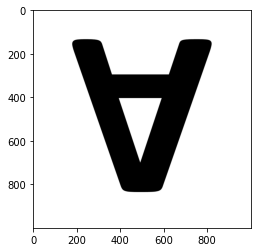

In [11]:
import cv2
from matplotlib import pyplot as plt
letter = 'a'
dir_name = "/mnt/c/Users/monique/Documents/Codes/gifs/images/letters/"
title = letter.upper() + '.png'
file_img = dir_name +  title
#mask = cv2.imread(os.path.join(in_path, f'{letter.upper()}.png',0))
mask = cv2.imread(file_img)
mask = cv2.flip(mask, 0)
plt.imshow(mask)

lists:  2
size: 1262


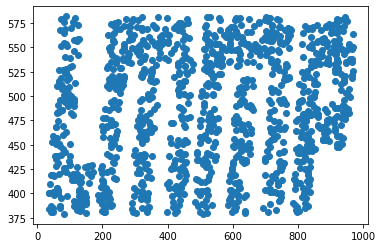

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import random
import cv2
import os
import re
import pandas as pd
import math
from collections import OrderedDict
import gc

def get_masked_data(letter, intensity, rand, in_path):
    """
    Receives a 'letter', which is the name of a file at /images/letters
    Convert the letter into a list of x coordinates 
    and a list of y coordinates to create the shape of that letter.
    Don't require the mask to be a letter, it can also be used 
    with other 1000x1000 png images. 
    
    letter:     A string with the name of the png file that contains a mask
    intensity:  This needs some work. When randonly positioning the points
                the intensity is how many times 500 points will be generated.
                With evenly sparced points, it controls the distance between the
                points.
    rand: If true generates random points, if false generate evenly sparced points
    """
    # get mask from image
    if in_path:
        file_img = letter.upper() + '.png'
        mask = cv2.imread(os.path.join(in_path, file_img),0)
        #mask = cv2.imread(file_img)
        mask = cv2.flip(mask, 0)
        #plt.imshow(mask)
    else:
        dir_path = os.path.dirname(os.path.realpath(__file__))
        mask = pd.read_pickle(os.path.join(dir_path,'masks.pkl'))
        mask = mask[mask['letter'] == letter.upper()]['mask'].values[0]
    # fill a plot with random points
    if rand:
        random.seed(420)
        x = []
        y = []
        
        for i in range(intensity):
            x = x + random.sample(range(0, 1000), 500)
            y = y + random.sample(range(0, 1000), 500)

    # fill a plot with evenly sparced points
    else:
        base = np.arange(0, 1000, intensity, dtype=int).tolist()
        y = []
        x = []

        for i in base:
            x_temp = [i]*len(base)
            y_temp = base
            x = x + x_temp
            y = y + y_temp

    # get only the coordinates inside the mask
    result_x = []
    result_y = []

    for i in range(len(x)):
        if mask[y[i]][x[i]] == 0:
            result_x.append(x[i])
            result_y.append(y[i])
            
    # return a list of x and y positions
    return result_x, result_y

# The program works with three methods
img_str = 'logo'
#pathin = 'images'
#img_path = str(pathin)
# 1- get masked data: 
# generates the random points and apply a mask to it
# if you don't pass a in_path the program uses a default dataframe with previously generated masks
# those include all letters from A to Z and two special images 'RICK' and 'MAC'
# If a in_path is passed the program will look in that directory for a .png file of 1000x1000 named as the first argument
xy = get_masked_data(img_str,
                    intensity=20,
                    rand=True,
                    in_path='./images/letters')

# creates two lists, x and y.
print('lists: ', len(xy))
print('size:', len(xy[0]))

import matplotlib.pyplot as plt
plt.scatter(xy[0], xy[1])
plt.show()

lists:  2
size: 1262


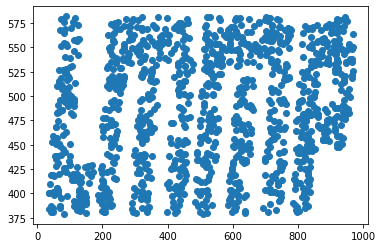

In [10]:
# The program works with three methods
img_str = 'logo'
#pathin = 'images'
#img_path = str(pathin)
# 1- get masked data: 
# generates the random points and apply a mask to it
# if you don't pass a in_path the program uses a default dataframe with previously generated masks
# those include all letters from A to Z and two special images 'RICK' and 'MAC'
# If a in_path is passed the program will look in that directory for a .png file of 1000x1000 named as the first argument
xy = sl.get_masked_data(img_str, 
                        intensity=20, 
                        rand=True,
                        in_path='./images/letters')

# creates two lists, x and y.
print('lists: ', len(xy))
print('size:', len(xy[0]))
plt.scatter(xy[0], xy[1])
plt.show()

In [14]:
# all parameters
sl.text_to_gif('_[LOGO]', # text to be converted to gif
               out_path='output', # relative path to save temp files and output
               repeat=True, # repeat first letter at the end
               intensity=10, # more info below*
               rand=True, # True=random points, false= evenly sparced
               gif_name='movie', # name of the output file. -> movie.gif
               n_frames=24, # number of frames in the transition
               bg_color='#95A4AD', # background color
               marker='o', # marker style
               marker_color='#283F4E', # marker color 
               marker_size=10, # marker size
               fps=24, # frames per second
               alpha=1, # markers opacity
               axis_on=True, # plot spines and grid
               sort_coords=False, # sort points in the transition - options(False, 'x', 'y')
               sort_coords_asc=True, # True - sort ascending / False - sort descending
               in_path='./images/letters', # for custom input paths
               hold_frames=5) # hold the complete letter for x frames

# *intensity: 
# When plotting random points (rand=True), this is how many times it'll generate 500 points at the start (before applying the mask).
# With randoms a higher intensity means more points.
# When plotting evenly sparced points (rand=False), this is the distance between the points.
# With even points a lower intensity means the points will be closer to each other, so more points are plotted.

Coordinates:   0%|          | 0/7 [00:00<?, ?it/s]

Plotting:   0%|          | 0/2 [00:00<?, ?it/s]

Frames:   0%|          | 0/25 [00:00<?, ?it/s]

Frames:   0%|          | 0/25 [00:00<?, ?it/s]

Gif:   0%|          | 0/65 [00:00<?, ?it/s]

Removing Imgs:   0%|          | 0/50 [00:00<?, ?it/s]

DONE


In [28]:
sl.text_to_gif('_[LOGO][MARCIO][PUC]', 
                out_path='output', # relative path to save temp files and output
                repeat=True, 
                intensity=90,
                rand=True, # True=random points, false= evenly sparced
                gif_name = 'movie1', 
                n_frames=24, 
                bg_color='#53abee', 
                marker_color='#1D1D1D', 
                marker_size = 2,
                marker='o', # marker style
                fps=24,
                alpha=0.7,
                axis_on=True, # plot spines and grid
                sort_coords=False, # sort points in the transition - options(False, 'x', 'y')
                sort_coords_asc=True, # True - sort ascending / False - sort descending
                in_path='./images/letters', # for custom input paths
                hold_frames=40)

Coordinates:   0%|          | 0/20 [00:00<?, ?it/s]

Plotting:   0%|          | 0/4 [00:00<?, ?it/s]

Frames:   0%|          | 0/25 [00:00<?, ?it/s]

Frames:   0%|          | 0/25 [00:00<?, ?it/s]

Frames:   0%|          | 0/25 [00:00<?, ?it/s]

Frames:   0%|          | 0/25 [00:00<?, ?it/s]

Gif:   0%|          | 0/300 [00:00<?, ?it/s]

Removing Imgs:   0%|          | 0/100 [00:00<?, ?it/s]

DONE


In [21]:
sl.text_to_gif('RICK[RICK][RICK]', 
                out_path='output', # relative path to save temp files and output
                repeat=True, 
                intensity=70,
                gif_name = 'movie3', 
                n_frames=24, 
                bg_color='#53abee', 
                marker_color='#1D1D1D', 
                marker_size = 1,
                fps=24,
                alpha=0.3,
                in_path='./images/letters', # for custom input paths
                axis_on=False)

Coordinates:   0%|          | 0/16 [00:00<?, ?it/s]

Plotting:   0%|          | 0/6 [00:00<?, ?it/s]

Frames:   0%|          | 0/25 [00:00<?, ?it/s]

Frames:   0%|          | 0/25 [00:00<?, ?it/s]

Frames:   0%|          | 0/25 [00:00<?, ?it/s]

Frames:   0%|          | 0/25 [00:00<?, ?it/s]

Frames:   0%|          | 0/25 [00:00<?, ?it/s]

Frames:   0%|          | 0/25 [00:00<?, ?it/s]

Gif:   0%|          | 0/185 [00:00<?, ?it/s]

Removing Imgs:   0%|          | 0/150 [00:00<?, ?it/s]

DONE
